In [1]:
## web graphics
%matplotlib inline
## interactive graphics
#%matplotlib notebook
%config InlineBackend.figure_format = 'png' 

In [2]:
import numpy as np
import warnings
from scipy.optimize import minimize
from scipy import stats
# plotting requirements
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from branching_process.util import plots

In [3]:
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model
sim = reload(sim)
influence = reload(influence)
model = reload(model)


Automatic pdb calling has been turned OFF


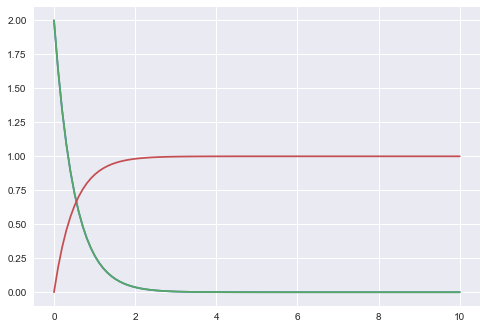

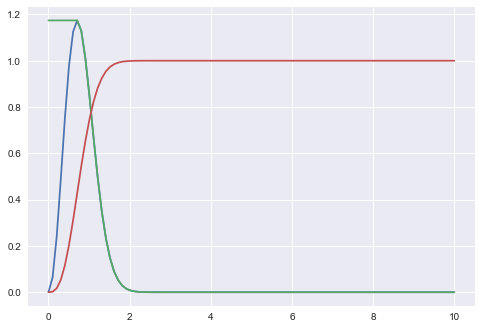

In [4]:
%pdb off
influence = reload(influence)
exp_phi = influence.ExpKernel()
causal_phi = influence.MaxwellKernel()
eval_ts = np.linspace(0, 10, 100)
tau=0.5

plt.figure();
plt.plot(eval_ts, exp_phi(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, exp_phi.majorant(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, exp_phi.integrate(eval_ts, tau=tau).ravel());

plt.figure();
plt.plot(eval_ts, causal_phi(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, causal_phi.majorant(eval_ts, tau=tau).ravel());
plt.plot(eval_ts, causal_phi.integrate(eval_ts, tau=tau).ravel());


Automatic pdb calling has been turned ON


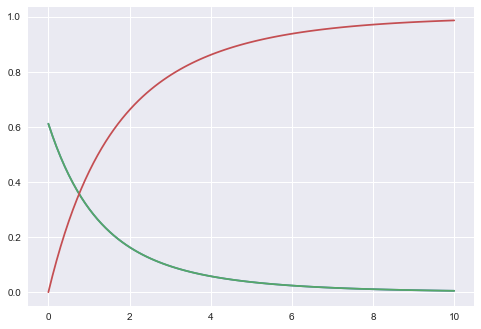

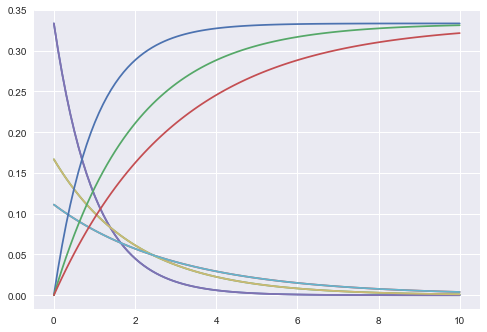

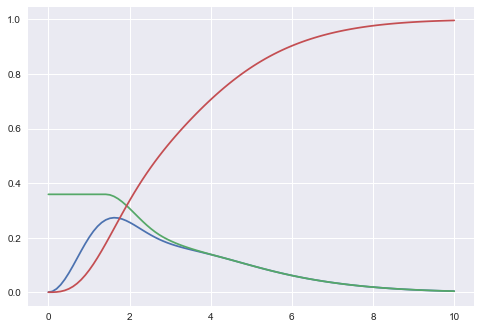

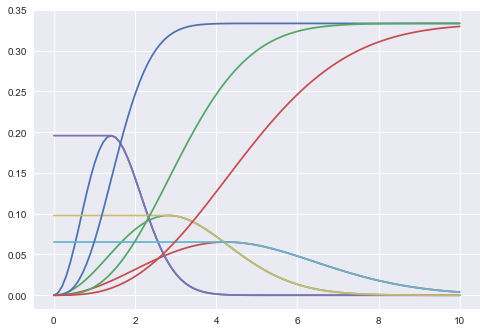

In [5]:
%pdb on
influence = reload(influence)
exp_phi = influence.ExpKernel(n_bases=3)
causal_phi = influence.MaxwellKernel(n_bases=3)
eval_ts = np.linspace(0, 10, 100)
tau=np.array([1,2,3])

plt.figure();
plt.plot(eval_ts, exp_phi(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.majorant(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.integrate(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, exp_phi.call_each(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.majorant_each(eval_ts, tau=tau));
plt.plot(eval_ts, exp_phi.integrate_each(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, causal_phi(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.majorant(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.integrate(eval_ts, tau=tau));

plt.figure();
plt.plot(eval_ts, causal_phi.call_each(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.majorant_each(eval_ts, tau=tau));
plt.plot(eval_ts, causal_phi.integrate_each(eval_ts, tau=tau));


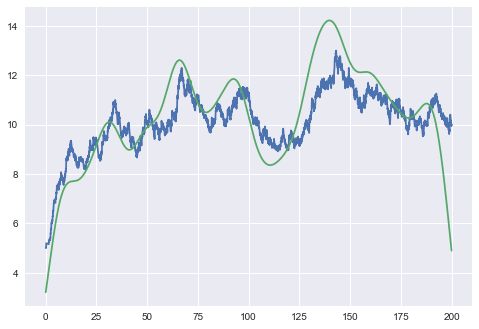

In [6]:
import numpy.random
numpy.random.seed(1237)
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, background
background = reload(background)
sim = reload(sim)
influence = reload(influence)
model = reload(model)

fixed_exp_phi = influence.ExpKernel(tau=np.array([5]), kappa=np.array([0.5]))

param_exp = dict(
    phi_kernel=fixed_exp_phi,
    mu=5.0,
    t_start=0.0,
    t_end=200)

ts = sim.sim_hawkes(sort=True, **param_exp)
eval_ts = np.linspace(param_exp['t_start'], param_exp['t_end'], 5000)

cond_intensity = model.lam_hawkes(ts, eval_ts=eval_ts, **param_exp)
uncond_intensity = model.lam(ts, eval_ts=eval_ts)
plt.plot(eval_ts, cond_intensity);
plt.plot(eval_ts, uncond_intensity);

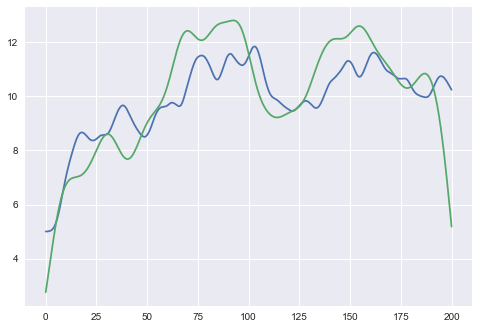

In [7]:
import numpy.random
numpy.random.seed(1237)
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, background
background = reload(background)
sim = reload(sim)
influence = reload(influence)
model = reload(model)

causal_phi = influence.MaxwellKernel(tau=5, kappa=np.array([0.5]))

param_causal = dict(
    phi_kernel=causal_phi,
    mu=5.0,
    t_start=0.0,
    t_end=200)

sim = reload(sim)
ts = np.sort(sim.sim_hawkes(**param_causal));
eval_ts = np.linspace(param_causal['t_start'], param_causal['t_end'], 5000)

cond_intensity = model.lam_hawkes(ts, eval_ts=eval_ts, **param_causal)
uncond_intensity = model.lam(ts, eval_ts=eval_ts)
plt.plot(eval_ts, cond_intensity);
plt.plot(eval_ts, uncond_intensity);

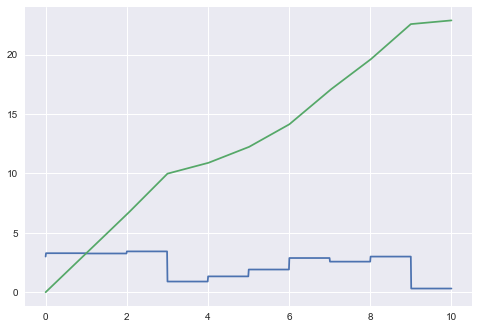

In [8]:
import numpy.random
numpy.random.seed(1237)
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, background
background = reload(background)
sim = reload(sim)
influence = reload(influence)
model = reload(model)

eval_ts = np.linspace(0, 10, 1000)
mu = 3
n_bases = 10
kappa = np.random.uniform(-1,1, size=n_bases)**3*3

step_phi = background.AdditiveStepKernel(n_bases=n_bases, t_end=10, mu=mu)

plt.figure();
plt.plot(eval_ts, step_phi(eval_ts, kappa=kappa));
plt.plot(eval_ts, step_phi.integrate(eval_ts, kappa=kappa));



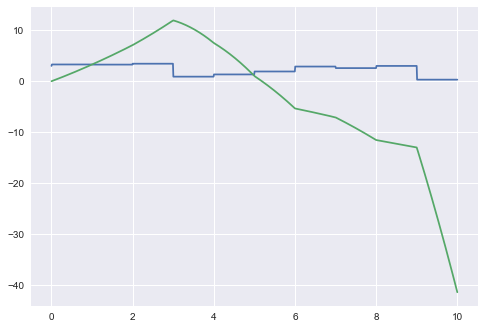

In [9]:
import numpy.random
numpy.random.seed(1237)
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, background
background = reload(background)
sim = reload(sim)
influence = reload(influence)
model = reload(model)

eval_ts = np.linspace(0, 10, 1000)
mu = 3
n_bases = 10
kappa = np.random.uniform(-1,1, size=n_bases)**3

step_phi = background.MultiplicativeStepKernel(n_bases=n_bases, t_end=10, mu=mu)

plt.figure();
plt.plot(eval_ts, step_phi(eval_ts, kappa=kappa));
plt.plot(eval_ts, step_phi.integrate(eval_ts, kappa=kappa));



In [10]:
import numpy.random
numpy.random.seed(1237)
from importlib import reload
import branching_process
branching_process = reload(branching_process)
from branching_process import cts
from branching_process.cts import sim, influence, model
sim = reload(sim)
influence = reload(influence)
model = reload(model)
cts = reload(cts)

fixed_exp_kernel = influence.ExpKernel(tau=5, kappa=0.5)
approx_kernel = influence.MaxwellKernel(n_bases=5, tau=np.array([1,2,3,4,5]))

param_exp = dict(
    phi_kernel=fixed_exp_kernel,
    mu=5.0,
    t_start=0.0,
    t_end=200)

ts = sim.sim_hawkes(**param_exp);

print(
    'well specified',
    model.loglik(ts=ts, mu=0.5, phi_kernel=fixed_exp_kernel, kappa=np.array([0.5])),
    model.loglik(ts=ts, mu=5, phi_kernel=fixed_exp_kernel, kappa=np.array([0.5])),
    model.loglik(ts=ts, mu=50, phi_kernel=fixed_exp_kernel, kappa=np.array([0.5])),
)

print(
    'misspecified',
    model.loglik(ts=ts, mu=0.5, phi_kernel=approx_kernel, kappa=np.array([0.5, 0.3, 0, 0, 0,])),
    model.loglik(ts=ts, mu=5, phi_kernel=approx_kernel, kappa=np.array([0.5, 0.3, 0, 0, 0,])),
    model.loglik(ts=ts, mu=50, phi_kernel=approx_kernel, kappa=np.array([0.5, 0.3, 0, 0, 0,])),
)


well specified [ 2507.1819928] [ 2851.78005221] [-2605.08750167]
misspecified [ 2799.0471227] [ 2784.00874615] [-3121.68664679]


In [30]:
%pdb off
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, fit, background
sim = reload(sim)
background = reload(background)
influence = reload(influence)
model = reload(model)
fit = reload(fit)

import numpy.random
numpy.random.seed(1237)

fixed_exp_kernel = influence.ExpKernel(tau=np.array(5), kappa=np.array(0.5))
param_exp = dict(
    phi_kernel=fixed_exp_kernel,
    mu=5.0,
    t_start=0.0,
    t_end=200)
ts = sim.sim_hawkes(**param_exp);

hawkes = fit.ContinuousExact(
#      debug=True
)
fit = hawkes.fit(
    ts,
    phi_kernel=fixed_exp_kernel,
    fit_omega=False,
    fit_tau=False,
    max_steps=5,
    t_end=200,
)
print(fit)


Automatic pdb calling has been turned OFF


/usr/local/lib/python3.6/site-packages/autograd/core.py:69: RuntimeWarning: divide by zero encountered in log
  result_value = self.fun(*argvals, **kwargs)
/usr/local/lib/python3.6/site-packages/autograd/core.py:69: RuntimeWarning: divide by zero encountered in true_divide
  result_value = self.fun(*argvals, **kwargs)


{'mu': array([ 5.20420846]), 'kappa': array([ 0.51302091]), 'tau': array(5), 'omega': array([], dtype=float64), 'pi_omega': 1e-08, 'pi_kappa': 0.0}


(array([-2853.05291812]), array([[-12.05876892]]))

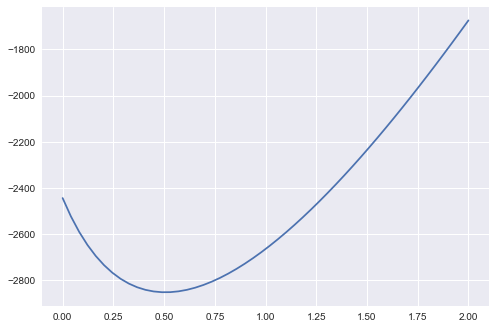

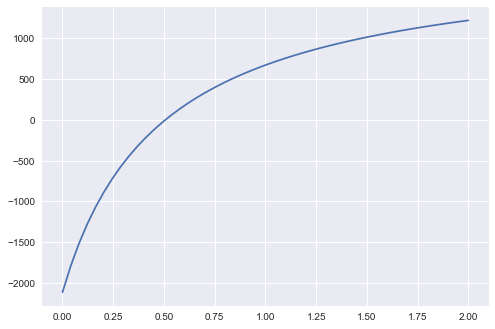

In [24]:
kappa_guesses = np.linspace(0,2,50)
loss = [hawkes.obj_kappa(k) for k in kappa_guesses.reshape(-1, 1)]
g = [hawkes._grad_kappa(k) for k in kappa_guesses.reshape(-1, 1)]
plt.plot(kappa_guesses, loss);
plt.figure();
plt.plot(kappa_guesses, g);

In [32]:
%pdb off
from branching_process import cts
cts = reload(cts)
from branching_process.cts import sim, influence, model, fit, background
sim = reload(sim)
background = reload(background)
influence = reload(influence)
model = reload(model)
fit = reload(fit)

import numpy.random
numpy.random.seed(1237)

fixed_exp_kernel = influence.ExpKernel(tau=np.array(5), kappa=np.array(0.5))
param_exp = dict(
    phi_kernel=fixed_exp_kernel,
    mu=5.0,
    t_start=0.0,
    t_end=200)
ts = sim.sim_hawkes(**param_exp);

hawkes = fit.ContinuousExact(
#      debug=True
)
fit = hawkes.fit(
    ts,
    phi_kernel=influence.MaxwellKernel(n_bases=10, tau=np.arange(10)+1),
    fit_omega=False,
    fit_tau=False,
    max_steps=5,
)
print(fit)

Automatic pdb calling has been turned OFF
{'mu': array([ 1.9086393]), 'kappa': array([ 0.26331311,  0.35032927,  0.        ,  0.13101617,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.10083331]), 'tau': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'omega': array([], dtype=float64), 'pi_omega': 1e-08, 'pi_kappa': 0.0}
